## Importing Labraries

In [1]:
import math 
from pandas_datareader import data, wb
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import numpy as np
import scipy
import pandas as pd

# For Checking Normal Dist
from scipy.stats import probplot
from scipy.stats import jarque_bera
from scipy.stats import kstest
import pylab
import pprint

%matplotlib inline

def nCr(n, r):
    f = math.factorial
    return (f(n)/f(r))/f(n-r)

## Class to Handle Stock Data and Plot it and also check Normality of Data

In [2]:
class StockData():
    """ 
    Class to Handle Stock Data
    """
    
    def __init__(self, ticker = "GME", start="2002-02-13", end="2022-05-04"):
        """
        ticker = stocke ticker
        start = start date of data
        end = end data of data
        """
        self.ticker = ticker
        self.start = start
        self.end = end
        
    def fetchData(self):
        '''
        To fetch previous data
        '''
        ticker = self.ticker
        start = self.start
        end = self.end
        data = pdr.get_data_yahoo(ticker, start, end)
        data_AdjClose = data["Adj Close"]
        data_diff = data_AdjClose.diff()
        data_ret = data_diff/data_AdjClose
        ret_pos =[]
        ret_neg =[]
        for dt in data_ret:
            if dt >0:
                ret_pos.append(dt)
            elif dt < 0:
                ret_neg.append(dt)
            else:
                pass
        u = np.average(ret_pos)
        d = np.average(ret_neg)
        data_close = data["Close"]
        s0 = data_close[-1]
        sigma = np.std(data_ret)
        stockdata = {}
        stockdata['data'] = data
        stockdata['data']['Returns'] = data_ret
        stockdata['up'] = u
        stockdata['down'] = d
        stockdata['initialStockPrice'] = s0
        stockdata['volitality'] = sigma
        self.stockdata = stockdata
        
    def plotFetchData(self):
        '''
        Plot previous data
        '''
        dd = self.stockdata['data']
        dd['Open'].plot(label = 'GME-Open', figsize = (15,10))
        dd['Close'].plot(label = 'GME-Close')
        dd['Low'].plot(label = 'GME-Low')
        dd['High'].plot(label = 'GME-High')
        plt.title(f'{self.ticker} Stock Prices')
        plt.legend()
        
    def plotLogReturns(self):
        df1 = self.stockdata['data']['Adj Close']
        log_price = np.log(df1)
        log_ret = log_price.diff()
        self.stockdata['data']['AdjCloseLogDif'] = df1
        self.stockdata['data']['AdjCloseLogDif'].plot(label = "Log Diff", figsize = (15,10))
        plt.title("Log Difference")
        plt.legend()
        
    def plotHistograms(self):
        self.stockdata['data']['AdjCloseLogDifReturns'] = (self.stockdata['data']['AdjCloseLogDif']/self.stockdata['data']['AdjCloseLogDif'].shift(1))-1
        self.stockdata['data']['AdjCloseLogDifReturns'].hist(bins=100, alpha=0.5, label = "Log Diff", figsize = (15,10))
        
    def checkQQPlotNormality(self):
        probplot(self.stockdata['data']['AdjCloseLogDifReturns'], dist="norm", plot=pylab)
        pylab.show()
    
    def checkJerqBerraPlotNormality(self):
        '''
        NULL Hypothesis (H0): Sample and stock data doesn't follow same distribution
        '''
        temp = self.stockdata['data']['Returns'].dropna()
        jbStats, pValue = jarque_bera(temp)
        print("JB Statistic ==> ", jbStats, "P-value ===>", pValue)
        if pValue > 0.5:
            print("since P-Value is > 0.5 null hyypothesis is true so no normal distribution")
        else:
            print("since P-Value is < 0.5 null hyypothesis is true so normal distribution")
    
    def checkKolmogorovSmirnovPlotNormality(self):
        '''
        NULL Hypothesis (H0): Sample and stock data are from same distribution
        '''
        temp = self.stockdata['data']['Returns'].dropna()
        KSStats, pValue = kstest(temp, cdf='norm')
        print("KS Statistic ==> ", KSStats, "P-value ===>", pValue)
        if pValue > 0.5:
            print("since P-Value is > 0.5 null hyypothesis is true so no normal distribution")
        else:
            print("since P-Value is < 0.5 null hyypothesis is true so normal distribution")
    
    def printHead(self):
        print(self.stockdata['data'].head(10))
        
    def pprintStockData(self):
        pprint.pprint(self.stockdata)

In [3]:
GME = StockData()

In [4]:
GME.fetchData()

In [5]:
GME.printHead()

              High    Low    Open   Close      Volume  Adj Close   Returns
Date                                                                      
2002-02-13  10.060  9.525   9.625  10.050  19054000.0   6.766666       NaN
2002-02-14  10.195  9.925  10.175  10.000   2755400.0   6.733001 -0.005000
2002-02-15  10.025  9.850  10.000   9.950   2097400.0   6.699336 -0.005025
2002-02-19   9.900  9.375   9.900   9.550   1852600.0   6.430017 -0.041885
2002-02-20   9.875  9.525   9.600   9.875   1723200.0   6.648839  0.032911
2002-02-21   9.925  9.750   9.840   9.850   1744200.0   6.632006 -0.002538
2002-02-22   9.925  9.600   9.925   9.675    881400.0   6.514179 -0.018088
2002-02-25   9.825  9.540   9.650   9.750    863400.0   6.564676  0.007692
2002-02-26   9.850  9.545   9.700   9.750    690400.0   6.564676  0.000000
2002-02-27   9.680  9.500   9.675   9.575   1022800.0   6.446848 -0.018277


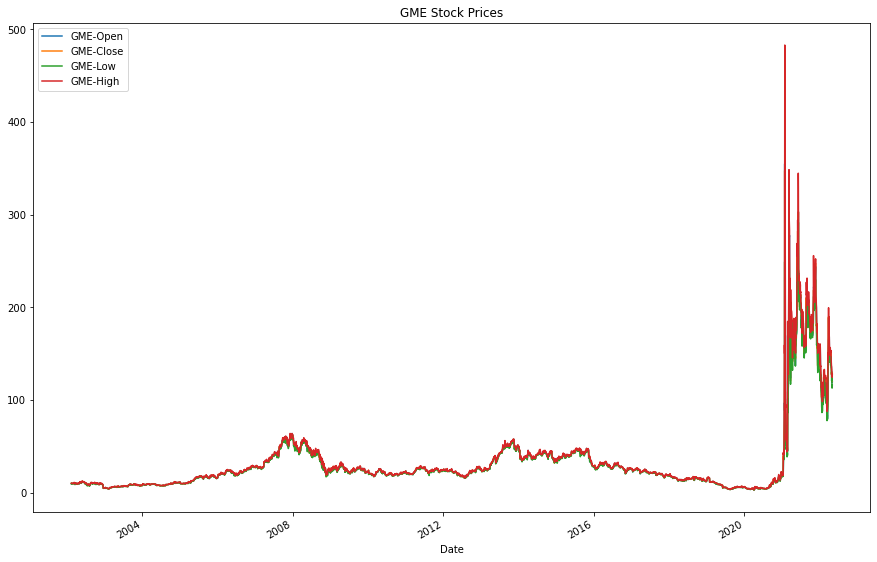

In [6]:
GME.plotFetchData()

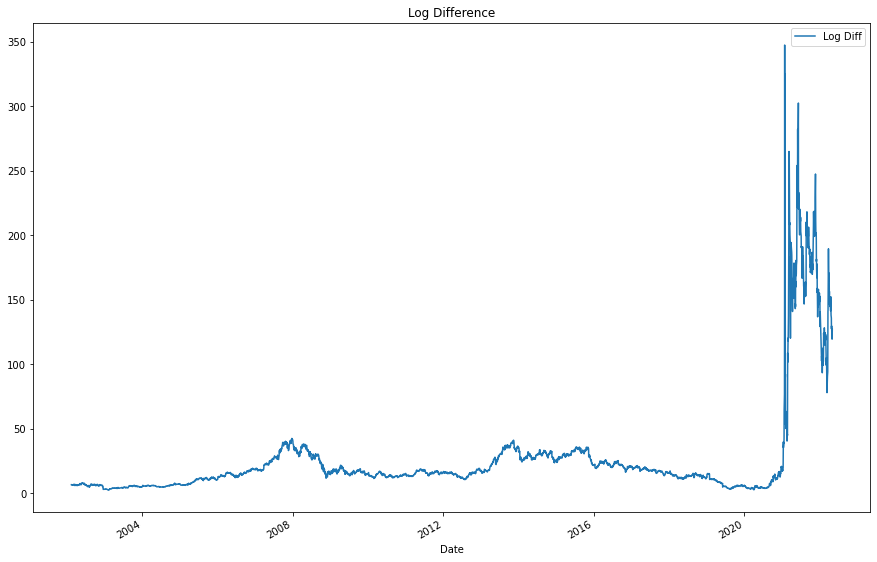

In [7]:
GME.plotLogReturns()

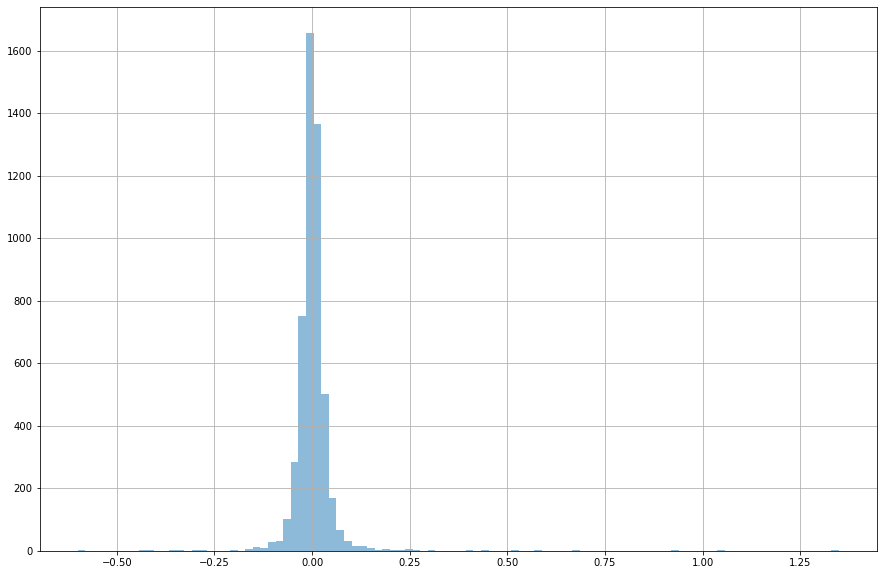

In [8]:
GME.plotHistograms()

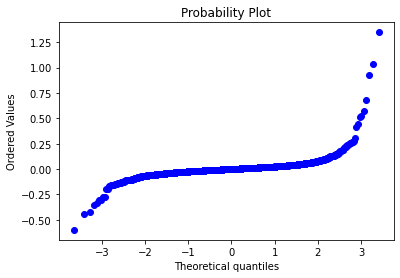

In [9]:
GME.checkQQPlotNormality()

In [10]:
GME.checkJerqBerraPlotNormality()

JB Statistic ==>  10258304.576408982 P-value ===> 0.0
since P-Value is < 0.5 null hyypothesis is true so normal distribution


In [11]:
GME.checkKolmogorovSmirnovPlotNormality()

KS Statistic ==>  0.450100609266082 P-value ===> 0.0
since P-Value is < 0.5 null hyypothesis is true so normal distribution


In [12]:
GME.printHead()

              High    Low    Open   Close      Volume  Adj Close   Returns  \
Date                                                                         
2002-02-13  10.060  9.525   9.625  10.050  19054000.0   6.766666       NaN   
2002-02-14  10.195  9.925  10.175  10.000   2755400.0   6.733001 -0.005000   
2002-02-15  10.025  9.850  10.000   9.950   2097400.0   6.699336 -0.005025   
2002-02-19   9.900  9.375   9.900   9.550   1852600.0   6.430017 -0.041885   
2002-02-20   9.875  9.525   9.600   9.875   1723200.0   6.648839  0.032911   
2002-02-21   9.925  9.750   9.840   9.850   1744200.0   6.632006 -0.002538   
2002-02-22   9.925  9.600   9.925   9.675    881400.0   6.514179 -0.018088   
2002-02-25   9.825  9.540   9.650   9.750    863400.0   6.564676  0.007692   
2002-02-26   9.850  9.545   9.700   9.750    690400.0   6.564676  0.000000   
2002-02-27   9.680  9.500   9.675   9.575   1022800.0   6.446848 -0.018277   

            AdjCloseLogDif  AdjCloseLogDifReturns  
Date       

In [13]:
GME.pprintStockData()

{'data':                   High         Low        Open       Close      Volume  \
Date                                                                     
2002-02-13   10.060000    9.525000    9.625000   10.050000  19054000.0   
2002-02-14   10.195000    9.925000   10.175000   10.000000   2755400.0   
2002-02-15   10.025000    9.850000   10.000000    9.950000   2097400.0   
2002-02-19    9.900000    9.375000    9.900000    9.550000   1852600.0   
2002-02-20    9.875000    9.525000    9.600000    9.875000   1723200.0   
...                ...         ...         ...         ...         ...   
2022-04-28  132.600006  120.500000  130.279999  129.309998   1767500.0   
2022-04-29  130.889999  123.010002  127.300003  125.070000   1284200.0   
2022-05-02  125.389999  112.699997  123.650002  119.570000   2543000.0   
2022-05-03  124.430000  114.419998  118.480003  120.430000   1828200.0   
2022-05-04  127.750000  115.720001  119.209999  127.080002   1659500.0   

             Adj Close   Ret

In [14]:
# it is already calculated in fetData Function
print("Historical Volatility using log return  ==> ", GME.stockdata['volitality'])

Historical Volatility using log return  ==>  0.048752724563792045


## Option Pricing

### CRR MODEL

In [15]:
class OptionCRR():
    """
    This function find the option price under CRR Model.
    """
    def __init__(self, s0, sigma, strike, maturity, rfr, n, dyield = None):
        '''
        s0: initial equity price, sigma: volatility, rfr: risk free rate, n: number
        '''
        self.s0 = s0
        self.sigma = sigma
        self.rfr = rfr
        self.maturity = maturity
        self.strike = strike
        self.n = n
        self.dyield = dyield
        
    def price(self):
        delta = float(self.maturity)/float(self.n)
        u = math.exp(self.sigma*math.sqrt(delta))
        d = 1/math.exp(self.sigma*math.sqrt(delta))
        if self.dyield == None:
            q = (math.exp(self.rfr*delta) - d) / (u - d) # probability
        else:
            q = (math.exp((self.rfr-self.dyield)*delta) - d) / (u - d)
        prc = 0
        temp_stock = 0
        temp_payout = 0
        for x in range(0, self.n + 1):
            temp_stock = self.s0*((u)**(x))*((d)**(self.n - x))
            temp_payout = max(temp_stock - self.strike, 0)
            prc += nCr(self.n, x)*(q**(x))*((1-q)**(self.n - x))*temp_payout
        prc = prc / ((1+ self.rfr*delta )**self.n)
        #prc = prc / math.exp(self.rfr*delta)
        return prc

In [16]:
GME.stockdata['data'].iloc[-3*30]

High                     1.526200e+02
Low                      1.400000e+02
Open                     1.520000e+02
Close                    1.483100e+02
Volume                   1.613600e+06
Adj Close                1.483100e+02
Returns                 -2.582430e-02
AdjCloseLogDif           1.483100e+02
AdjCloseLogDifReturns   -2.517419e-02
Name: 2021-12-27 00:00:00, dtype: float64

In [17]:
GME.stockdata['data'].iloc[-1]

High                     1.277500e+02
Low                      1.157200e+02
Open                     1.192100e+02
Close                    1.270800e+02
Volume                   1.659500e+06
Adj Close                1.270800e+02
Returns                  5.232925e-02
AdjCloseLogDif           1.270800e+02
AdjCloseLogDifReturns    5.521881e-02
Name: 2022-05-04 00:00:00, dtype: float64

In [18]:
#rfr: 3 month yield from internet {https://ycharts.com/indicators/3_month_t_bill#:~:text=3%20Month%20Treasury%20Bill%20Rate%20is%20at%200.90%25%2C%20compared%20to,long%20term%20average%20of%204.18%25.}
riskFreeRate = 0.90 #rfr 
initialStockPrice = GME.stockdata['initialStockPrice'] #S0
annualVolatility = GME.stockdata['volitality'] #sigma
GME.stockdata['data'].iloc[-3*30] 
#s0, sigma, strike, maturity, rfr, n, dyield = None
# In-The-money (ITM) European Call i.e. strike_price < initial_Price
# Let Stricke_price = initial_price -100
cr = OptionCRR(initialStockPrice, annualVolatility, initialStockPrice - 100, 90/365.0, riskFreeRate, 50) #CRR Model

In [19]:
cr.price()

105.441190906538

### GBM Estimation

In [20]:
from numpy.random import normal

def gbmEstm(T = 20, N=100):
    data = pd.read_csv('GME.csv', index_col='Date', parse_dates=True)
    data.sort_index(inplace=True)
    r = np.log(data['Adj Close']).diff() #log returns
    # estimate parameters
    sigma = np.std(r)
    mu = np.mean(r) + 0.5*sigma*sigma
    #path simulation.
    epsilon = normal(size=[T, N])
    paths = data['Adj Close'][-1]*np.exp(np.cumsum(mu-0.5*sigma*sigma +sigma*epsilon, axis=0))
    print('data from %s to %s' % (data.index[0].date(), data.index[-1].date()))
    c=0
    for item in paths:
        plt.plot(item)
    plt.show()
    return paths

data from 2002-02-13 to 2022-04-25


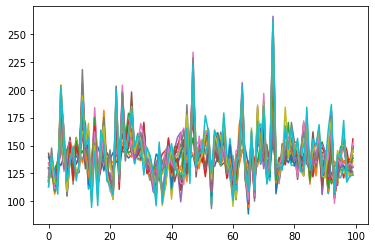

array([[140.19160758, 129.53693506, 128.43202008, ..., 135.59404763,
        137.99453292, 140.88605025],
       [133.62684495, 126.17539234, 118.94891396, ..., 130.88364748,
        134.38968898, 144.54830649],
       [130.17024283, 124.65082206, 125.414603  , ..., 129.87750081,
        134.26071524, 149.46045396],
       ...,
       [118.8683394 , 147.74406194, 116.1860272 , ..., 130.43556459,
        131.02042368, 126.28006465],
       [112.92897549, 139.17784617, 117.13853509, ..., 127.02199094,
        123.88699841, 124.33233953],
       [113.13495603, 141.25813491, 125.26218905, ..., 117.24575544,
        122.72957746, 123.41412853]])

In [21]:
gbmEstm(T=20, N=100)

### GBM Paths

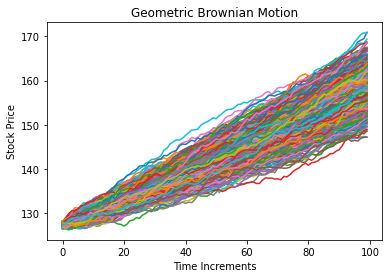

In [22]:
def GBM_paths(S, T, r, q, sigma, steps, N):
    """
    Inputs
    #S = Current stock Price
    #K = Strike Price
    #T = Time to maturity 1 year = 1, 1 months = 1/12
    #r = risk free interest rate
    #q = dividend yield
    # sigma = volatility
    Output
    # [steps,N] Matrix of asset paths
    """
    # S(t) = S(0)*exp(mu-sigm**2/2)+ sigma*B(t) GBM.
    dt = T/steps
    ST = np.log(S) + np.cumsum(((r - q - sigma**2/2)*dt +\
    sigma*np.sqrt(dt) * \
    np.random.normal(size=(steps,N))),axis=0)
    return np.exp(ST)

S = initialStockPrice # stock price S_{0}
K = initialStockPrice - 100 # strike
T = 1/4 # time to maturity
r = riskFreeRate # risk free risk in annual %
q = 0.02 # annual dividend rate
sigma = annualVolatility # annual volatility in %
steps = 100 # time steps
N = 1000 # number of trials

paths = GBM_paths(S,T,r,q,sigma,steps,N)
plt.plot(paths);
plt.xlabel("Time Increments")
plt.ylabel("Stock Price")
plt.title("Geometric Brownian Motion")
plt.show()

In [23]:
from numpy.linalg import norm
from scipy.stats import norm
def black_scholes_call(S,K,T,r,q,sigma):
    """
    Inputs
    # S = Current stock Price
    # K = Strike Price
    # T = Time to maturity 1 year = 1, 1 months = 1/12
    # r = risk free interest rate
    # q = dividend yield
    # sigma = volatility
    Output
    # call_price = value of the option
    """
    d1 = (np.log(S/K) + (r - q + sigma**2/2)*T) / sigma*np.sqrt(T)
    d2 = d1 - sigma* np.sqrt(T)
    call = S * np.exp(-q*T)* norm.cdf(d1) - K * np.exp(-r*T)*norm.cdf(d2)
    return call

#Simulated option price
payoffs = np.maximum(paths[-1]-K, 0)
option_price = np.mean(payoffs)*np.exp(-r*T) #discounting
bs_price = black_scholes_call(S,K,T,r,q,sigma)
print(f"Black Scholes Price is {bs_price}")
print(f"Simulated price is {option_price}")

Black Scholes Price is 104.82236701159754
Simulated price is 104.78110768977365


### Implied Volatility
Implied volatility describes how much volatility that options traders think the stock will have in the future.1﻿ You can tell what the implied volatility of a stock is by looking at how much the futures options prices vary. If the options prices start to rise, that means implied volatility is increasing, all other things being equal.

### ref:
1. https://www.thebalance.com/volatility-definition-and-types-3305968
2. https://stackoverflow.com/questions/61289020/fast-implied-volatility-calculation-in-python

Only for reserach function are from stackoverflow

In [29]:
import numpy as np
from scipy.stats import norm
N = norm.cdf

def blackShole_Call(S, K, T, r, vol):
    d1 = (np.log(S/K) + (r + 0.5*vol**2)*T) / (vol*np.sqrt(T))
    d2 = d1 - vol * np.sqrt(T)
    return S * norm.cdf(d1) - np.exp(-r * T) * K * norm.cdf(d2)

def blackSholes_vega(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return S * norm.pdf(d1) * np.sqrt(T)

def find_vol(target_value, S, K, T, r, *args):
    MAX_ITERATIONS = 200
    PRECISION = 1.0e-5
    sigma = 0.5
    for i in range(0, MAX_ITERATIONS):
        price = blackShole_Call(S, K, T, r, sigma)
        vega = blackSholes_vega(S, K, T, r, sigma)
        diff = target_value - price  # our root
        if (abs(diff) < PRECISION):
            return sigma
        sigma = sigma + diff/vega # f(x) / f'(x)
    return sigma # value wasn't found, return best guess so far

In [30]:
S = initialStockPrice
K = initialStockPrice-100
T = 1/4
r = riskFreeRate
vol = annualVolatility

V_market = blackShole_Call(S, K, T, r, vol)
implied_vol = find_vol(V_market, S, K, T, r)

print ('Implied vol: %.2f%%' % (implied_vol * 100))
print ('Market price = %.2f' % V_market)
print ('Model price = %.2f' % blackShole_Call(S, K, T, r, implied_vol))

Implied vol: 50.00%
Market price = 105.46
Model price = 105.46
